In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read data
url = 'https://raw.githubusercontent.com/nghiale0811/Practice-Datasets/main/insurance.csv'
dataset = pd.read_csv(url)

#EDA

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
dataset.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [7]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


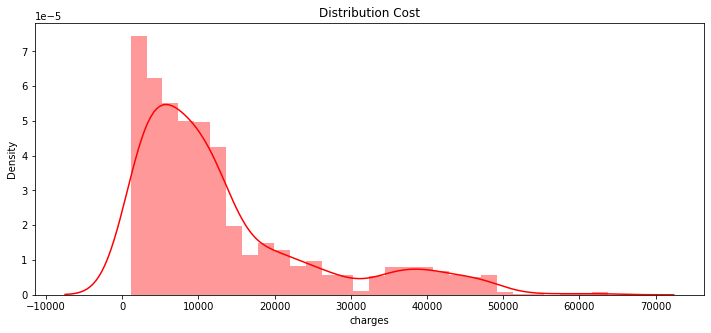

In [12]:
#Cost distribution
plt.figure(figsize=(12,5))
plt.title("Distribution Cost")
ax = sns.distplot(dataset["charges"], color = 'r')

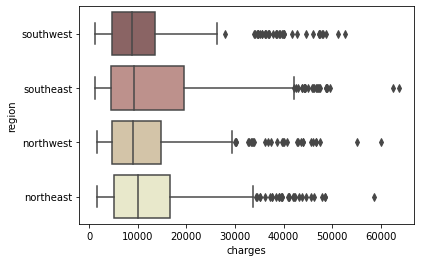

In [14]:
sns.boxplot(y="region", x="charges", data=dataset, palette = 'pink')

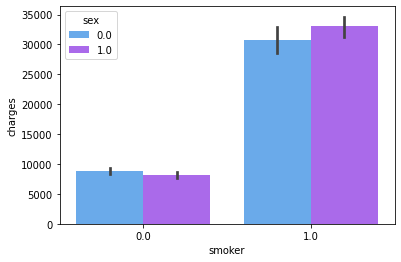

In [52]:
sns.barplot(x='smoker', y='charges', hue='sex', data=dataset, palette='cool')

In [57]:
##plotting the categorical features

cat_variable = dataset.dtypes==object
cat_variable = dataset.columns[cat_variable].tolist()

# Count of products per keys
def bar_plot(data,feature):
    print(f'There are {len(set(data[feature]))} unique {feature}')
    print('\n')
    sns.countplot(x = feature,
              data = data,
              order = data[feature].value_counts(ascending=False)[0:20].index)
    plt.xticks(rotation=90)
    print(f'Count of {feature}')
    print('\n')
    print(data[feature].value_counts(ascending=False)[0:20])
    plt.show()
    print('\n')
    
for i in cat_variable:
    bar_plot(dataset,i)

#Data Preprocessing

In [18]:
#Apply ordinal encoder (i.e categorical values into integers)
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit([dataset['region']])
dataset['region'] = oe.fit_transform(dataset[['region']])

In [19]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3.0,16884.92400
1,18,male,33.770,1,no,2.0,1725.55230
2,28,male,33.000,3,no,2.0,4449.46200
3,33,male,22.705,0,no,1.0,21984.47061
4,32,male,28.880,0,no,1.0,3866.85520


In [20]:
oe.fit([dataset['sex']])
dataset['sex'] = oe.fit_transform(dataset[['sex']])

In [21]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,yes,3.0,16884.92400
1,18,1.0,33.770,1,no,2.0,1725.55230
2,28,1.0,33.000,3,no,2.0,4449.46200
3,33,1.0,22.705,0,no,1.0,21984.47061
4,32,1.0,28.880,0,no,1.0,3866.85520


In [22]:
oe.fit([dataset['smoker']])
dataset['smoker'] = oe.fit_transform(dataset[['smoker']])

In [23]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


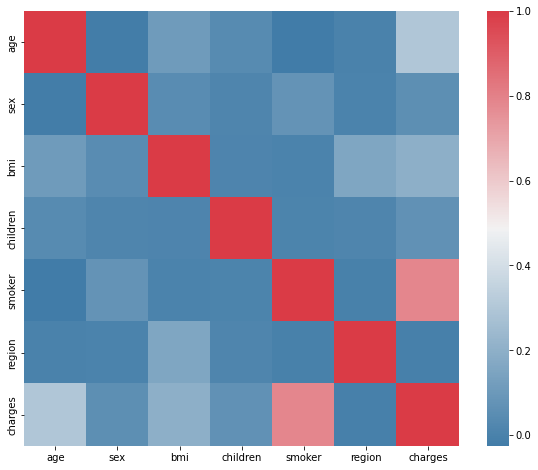

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

#Check for outliers

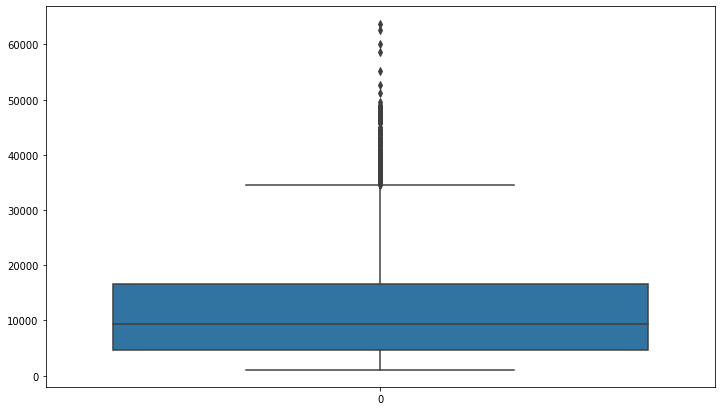

In [27]:
# using seaborn boxplot to identify outliers
plt.figure(figsize=(12, 7))
sns.boxplot(data=dataset['charges'])

In [38]:
from sklearn.preprocessing import MinMaxScaler

#try min-max scaler
scaler = MinMaxScaler()
arr = dataset['charges'].copy().values.reshape(-1, 1)
scaler.fit(arr)
scaler.transform(arr)
arr

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

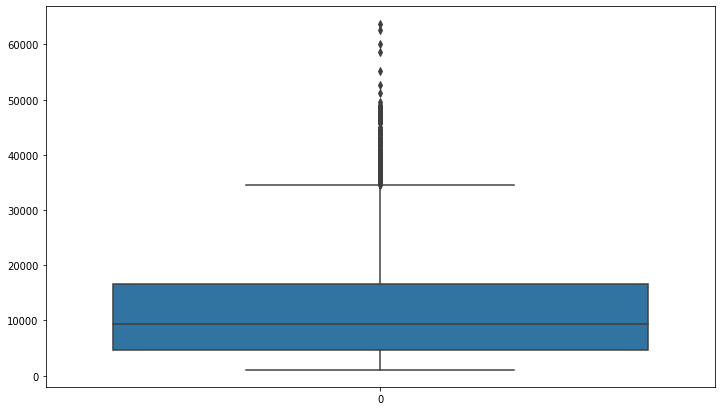

In [39]:
# using seaborn boxplot to identify outliers
plt.figure(figsize=(12, 7))
sns.boxplot(data=arr)

In [24]:
y = dataset['charges']
X = dataset.drop('charges', axis = 1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0


Since the dataset size is small, we may consider log transformation, Box-Cox, etc. First we gonna fit the model

#Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
    
# splitting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# training the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
# making predictions
prediction = lr.predict(X_test)
print(prediction)

[ 8.41281225e+03  5.89492129e+03  2.44643863e+04  1.45170222e+04
  1.02201811e+04  4.13561618e+03  1.01089367e+04  6.26233046e+03
  1.51981651e+04  1.68590102e+03  6.31161169e+03  1.00730206e+04
  1.10879455e+04  1.09657675e+04  4.24208152e+03  1.47391128e+04
  3.29499580e+03  2.45138188e+03  2.88738552e+04  8.11410451e+03
  9.56226725e+03  3.41061444e+04  3.18953774e+03  2.97238392e+03
  8.88776404e+03  7.06163452e+03  3.95049459e+04  7.75319858e+03
  1.20392181e+03  2.10935180e+03  3.29970623e+04  1.41199038e+04
  1.68248377e+04  9.24661731e+03  3.85396013e+04  3.97255606e+04
  4.85664249e+03  1.12880151e+04  8.39011298e+03  5.84422467e+03
  3.84217481e+03  1.52691963e+04  3.25585552e+04  1.31941687e+04
  7.61979952e+03  1.23055587e+04  1.77516165e+03  5.29457167e+03
  1.16441842e+04  2.82594488e+03  1.03315559e+04  1.14806116e+04
  7.88028892e+03  4.17642591e+03  4.23551021e+03  2.97241246e+04
  8.79151677e+03  8.52192575e+03  9.19658101e+03  6.76477173e+03
  9.14070501e+03  1.37408

In [44]:
print(lr.score(X_test,y_test))

0.7427593414976387


#Add polynomial features

In [45]:
from sklearn.preprocessing import PolynomialFeatures


quad = PolynomialFeatures(degree = 2)
x_quad = quad.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_quad, y, random_state = 0)

plr = LinearRegression().fit(X_train,y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,y_test))

0.8846283666147683


#Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_test_pred = forest.predict(X_test)

print('MSE test data: %.3f' % (mean_squared_error(y_test,forest_test_pred)))
print('R2 test data: %.3f' % (r2_score(y_test,forest_test_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


MSE test data: 20270900.937
R2 test data: 0.871


#Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train, y_train)

y_pred = Gradient_model.predict(X_test)

print('MSE test data: %.3f' % (mean_squared_error(y_test, y_pred)))
print('R2 test data: %.3f' % (r2_score(y_test, y_pred)))

MSE test data: 18203471.994
R2 test data: 0.884


#XGBRegressor

In [50]:
from xgboost import XGBRegressor

XGB_model =XGBRegressor()
XGB_model.fit(X_train, y_train)

y_pred = XGB_model.predict(X_test)

print('MSE test data: %.3f' % (mean_squared_error(y_test, y_pred)))
print('R2 test data: %.3f' % (r2_score(y_test, y_pred)))

[04:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE test data: 15881743.953
R2 test data: 0.899


#LightGBM Regressor

In [56]:
import lightgbm as lgb

clf = lgb.LGBMRegressor()
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print('MSE test data: %.3f' % (mean_squared_error(y_test, y_pred)))
print('R2 test data: %.3f' % (r2_score(y_test, y_pred)))

MSE test data: 20070735.106
R2 test data: 0.873
